# Problem Statement

Task 1:-Prepare a complete data analysis report on the given data.

Task 2:-On the basis of the mobile Specification like Battery power, 3G enabled , wifi ,Bluetooth, Ram etc predict the Price range of the mobile.

Task 3:- Prepare the analysis report stating how model will help expanding the business by stating several factors including feature importance.


# Importing Basic Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Load Dataset

In [8]:
df = pd.read_csv("C:/Users/Dell/Downloads/datasets_11167_15520_train.csv")

# Basic Analysis

In [9]:
df.head(5)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [10]:
df.tail(5)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0
1999,510,1,2.0,1,5,1,45,0.9,168,6,...,483,754,3919,19,4,2,1,1,1,3


In [11]:
# checking null values
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [12]:
# checking basic info about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [13]:
# checking the columns of dataset
df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [14]:
len(df.columns)

21

In [15]:
# checking about the mean, median, standard deviation, minimun, maximum values 
df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [16]:
#checking the number of rows and columns represent in dataset
df.shape

(2000, 21)

In [17]:
# checking if the dataset contains duplicated values or not
df.duplicated().sum()

np.int64(0)

In [18]:
df.price_range.unique()

array([1, 2, 3, 0])

# Insights
* All 21 features have complete data (no missing values).
* Battery power varies widely → major factor differentiating low-end and high-end phones.
* RAM shows the largest spread (256–3998 MB) → strongest indicator of price category.
* Pixel height/width have extreme variation, including very low values → big differences in display quality.
* Internal memory, camera features, and screen dimensions also vary noticeably across devices.
* Binary features (blue, dual_sim, four_g, three_g, touch_screen, wifi) are almost evenly split.
* Mobile weight shows limited variation → less important for predicting price.
* Talk time ranges from 2 to 20 hours → significant variation in battery endurance.
* Price_range is evenly distributed → dataset is well-balanced for classification.

# Exploratory Data Analysis-

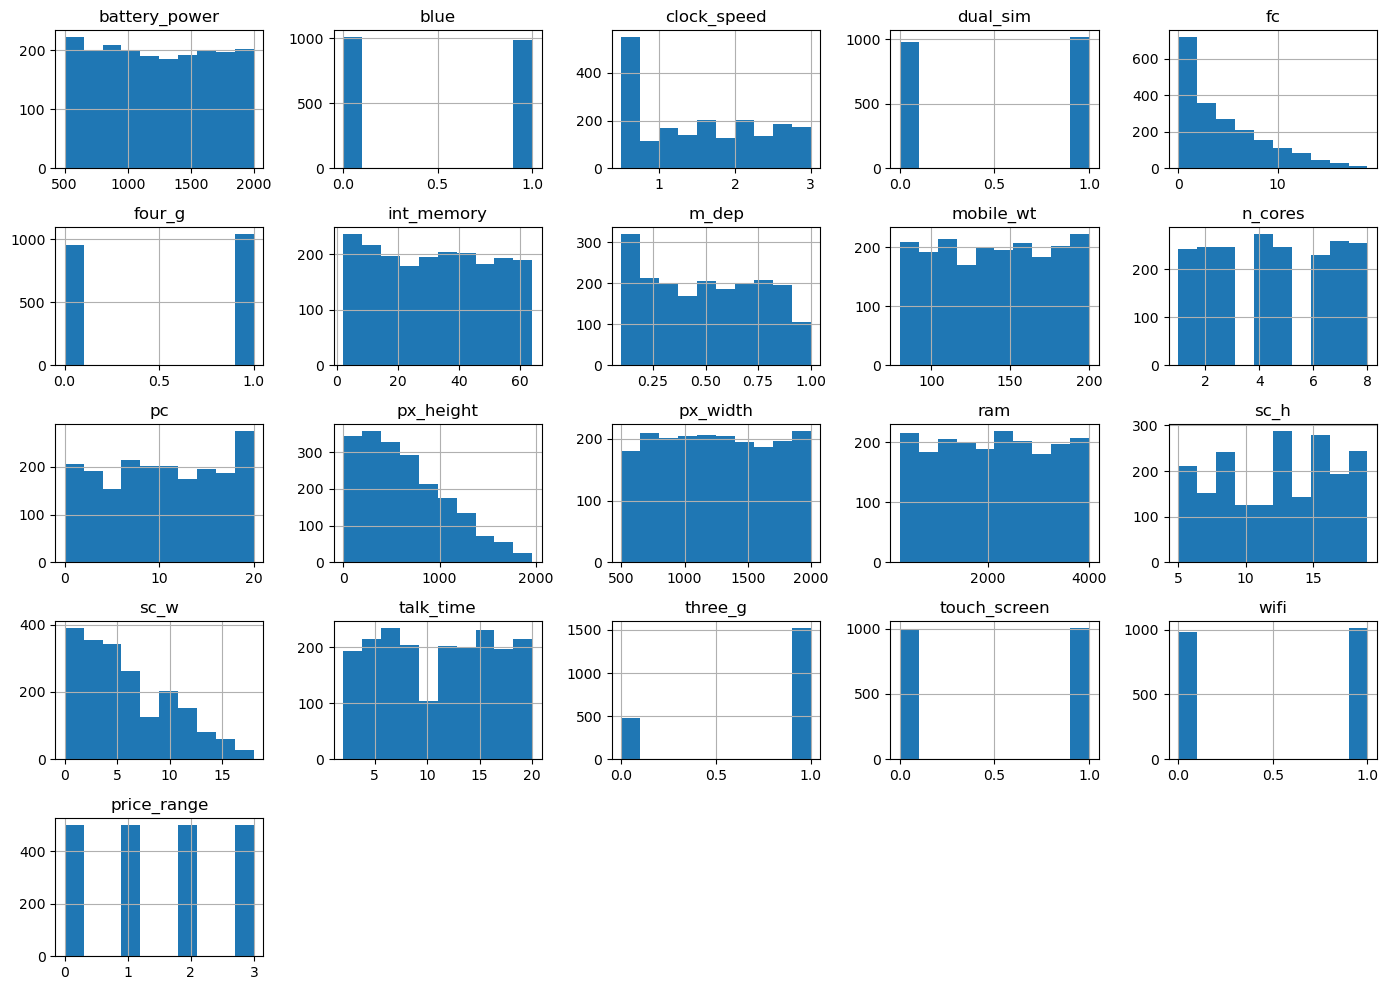

In [19]:
# histogram for all numerical features
df.hist(figsize=(14,10))
plt.tight_layout()
plt.show()

# Insights
* battery_power is uniformly spread; no extreme skew → phones across all battery capacities.
* boolean features (blue, dual_sim, four_g, three_g, touch_screen, wifi) are balanced, meaning equal distribution of 0 and 1.
* clock_speed has more values in the lower range → most phones have 0.5–1.5 GHz processors.
* int_memory appears evenly distributed → budget and high-storage phones are balanced.
* mobile_wt is roughly uniform between 80–200g → no major class imbalance.
* n_cores mostly between 2–7 cores → mid-range processors dominate.
* px_height and px_width are right-skewed → most phones have lower resolution displays.
* ram has a wide spread and strong variation → major factor for price segmentation.
* screen dimensions (sc_h & sc_w) show natural variation but no extreme values.
* talk_time is well distributed → phone battery efficiency varies across models.
* price_range is perfectly balanced with equal samples in classes 0,1,2,3 → ideal for classification.

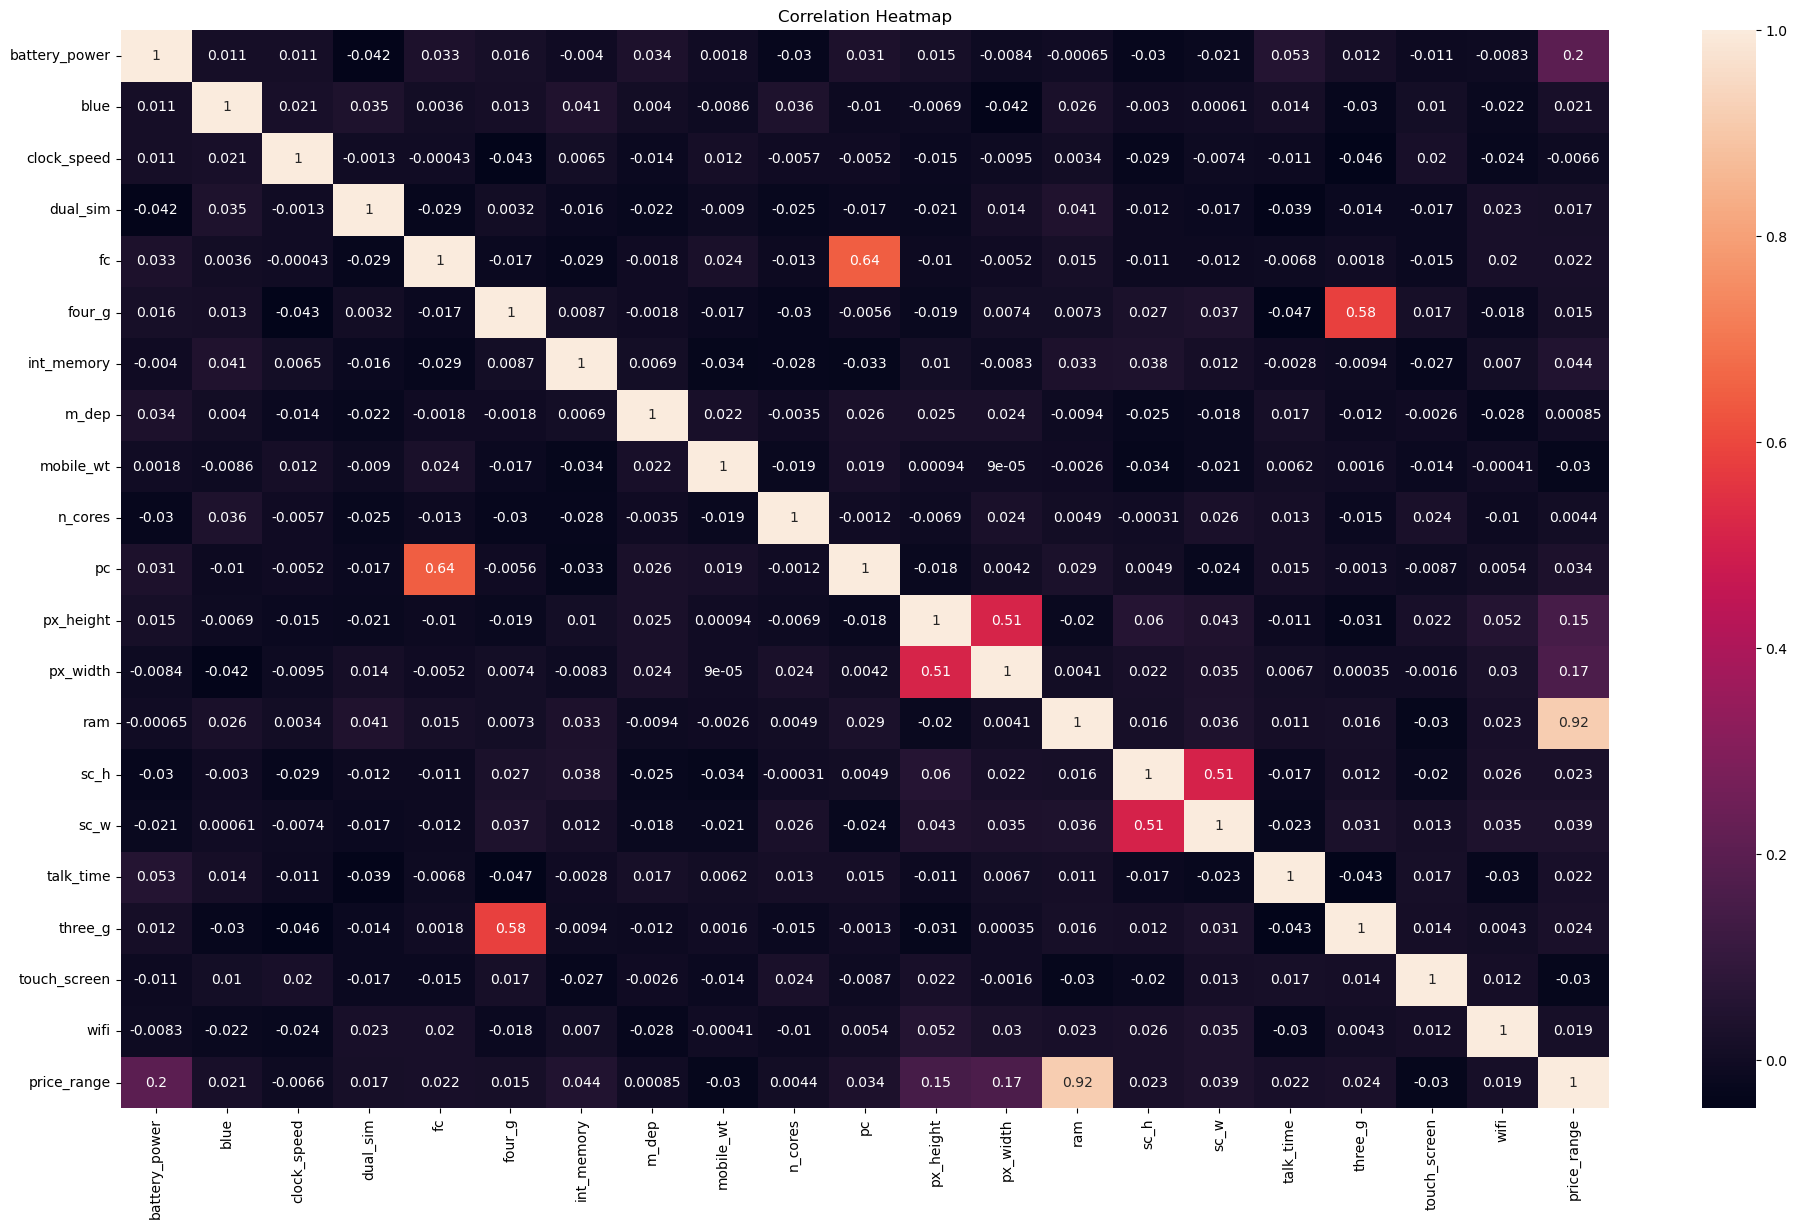

In [20]:
plt.figure(figsize=(24,14))
sns.heatmap(df.corr(), annot=True)
plt.title("Correlation Heatmap")
plt.show()

# Insights
* Most features show very weak correlation with each other → no multicollinearity issues.
* RAM has the strongest correlation with price_range (~0.92) → RAM is the most important predictor.
* px_height and px_width are moderately correlated (~0.51) → camera resolution dimensions are linked.
* pc and fc have a noticeable positive correlation (~0.64) → higher primary camera often comes with higher front camera.
* Connectivity features (3G, 4G, WiFi, Bluetooth) show nearly zero correlation with price.
* Overall, the heatmap indicates that price is mainly driven by hardware specs, not boolean features.

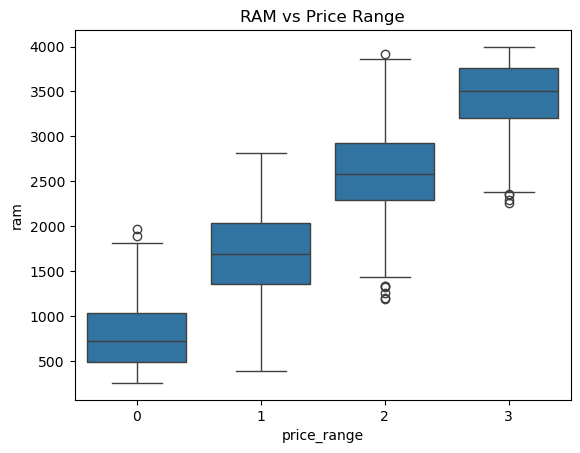

In [21]:
sns.boxplot(x='price_range', y='ram', data=df)
plt.title("RAM vs Price Range")
plt.show()

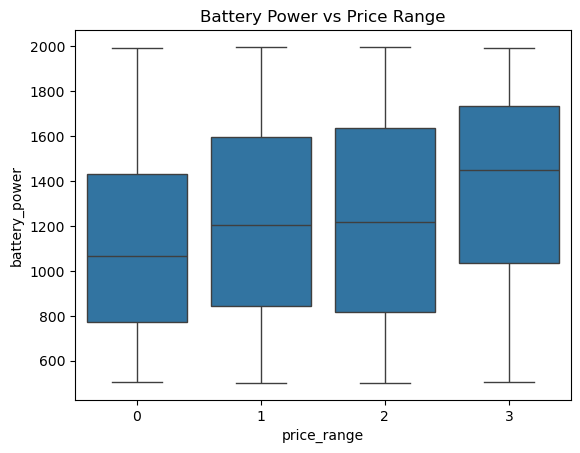

In [22]:
# battery power vs price
sns.boxplot(x='price_range', y='battery_power', data=df)
plt.title("Battery Power vs Price Range")
plt.show()

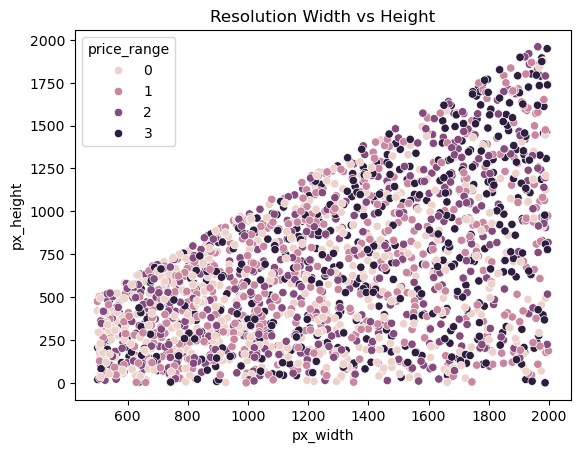

In [23]:
# pixel width vs height relationship
sns.scatterplot(x='px_width', y='px_height', hue='price_range', data=df)
plt.title("Resolution Width vs Height")
plt.show()

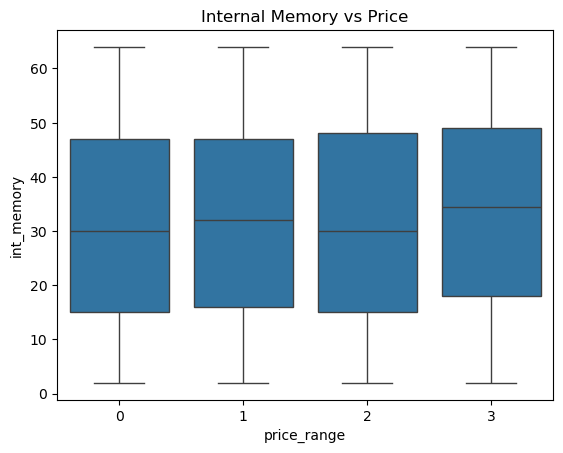

In [24]:
sns.boxplot(x='price_range', y='int_memory', data=df)
plt.title("Internal Memory vs Price")
plt.show()

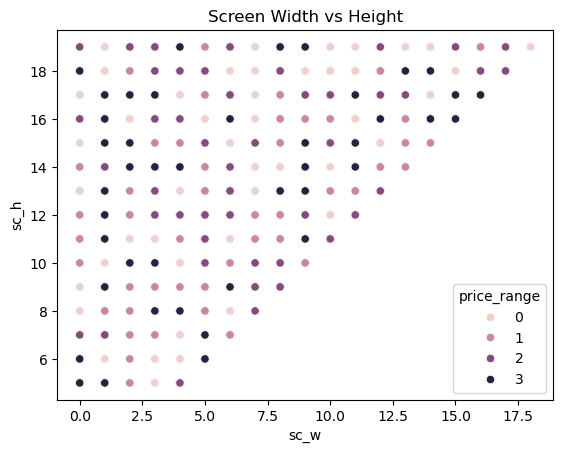

In [25]:
sns.scatterplot(x='sc_w', y='sc_h', hue='price_range', data=df)
plt.title("Screen Width vs Height")
plt.show()

# Spliting the data into x and y

In [26]:
x=df.drop('price_range',axis=1)
y=df['price_range']

In [27]:
x.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi'],
      dtype='object')

In [28]:
len(x.columns)

20

In [29]:
x.corr()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
battery_power,1.000000,0.011252,0.011482,-0.041847,0.033334,0.015665,-0.004004,0.034085,0.001844,-0.029727,0.031441,0.014901,-0.008402,-0.000653,-0.029959,-0.021421,0.052510,0.011522,-0.010516,-0.008343
blue,0.011252,1.000000,0.021419,0.035198,0.003593,0.013443,0.041177,0.004049,-0.008605,0.036161,-0.009952,-0.006872,-0.041533,0.026351,-0.002952,0.000613,0.013934,-0.030236,0.010061,-0.021863
clock_speed,0.011482,0.021419,1.000000,-0.001315,-0.000434,-0.043073,0.006545,-0.014364,0.012350,-0.005724,-0.005245,-0.014523,-0.009476,0.003443,-0.029078,-0.007378,-0.011432,-0.046433,0.019756,-0.024471
dual_sim,-0.041847,0.035198,-0.001315,1.000000,-0.029123,0.003187,-0.015679,-0.022142,-0.008979,-0.024658,-0.017143,-0.020875,0.014291,0.041072,-0.011949,-0.016666,-0.039404,-0.014008,-0.017117,0.022740
fc,0.033334,0.003593,-0.000434,-0.029123,1.000000,-0.016560,-0.029133,-0.001791,0.023618,-0.013356,0.644595,-0.009990,-0.005176,0.015099,-0.011014,-0.012373,-0.006829,0.001793,-0.014828,0.020085
four_g,0.015665,0.013443,-0.043073,0.003187,-0.016560,1.000000,0.008690,-0.001823,-0.016537,-0.029706,-0.005598,-0.019236,0.007448,0.007313,0.027166,0.037005,-0.046628,0.584246,0.016758,-0.017620
int_memory,-0.004004,0.041177,0.006545,-0.015679,-0.029133,0.008690,1.000000,0.006886,-0.034214,-0.028310,-0.033273,0.010441,-0.008335,0.032813,0.037771,0.011731,-0.002790,-0.009366,-0.026999,0.006993
m_dep,0.034085,0.004049,-0.014364,-0.022142,-0.001791,-0.001823,0.006886,1.000000,0.021756,-0.003504,0.026282,0.025263,0.023566,-0.009434,-0.025348,-0.018388,0.017003,-0.012065,-0.002638,-0.028353
mobile_wt,0.001844,-0.008605,0.012350,-0.008979,0.023618,-0.016537,-0.034214,0.021756,1.000000,-0.018989,0.018844,0.000939,0.000090,-0.002581,-0.033855,-0.020761,0.006209,0.001551,-0.014368,-0.000409
n_cores,-0.029727,0.036161,-0.005724,-0.024658,-0.013356,-0.029706,-0.028310,-0.003504,-0.018989,1.000000,-0.001193,-0.006872,0.024480,0.004868,-0.000315,0.025826,0.013148,-0.014733,0.023774,-0.009964


# Split Data for training and testing

In [30]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

# Model Building

# 1) KNN Algorithm


In [31]:
accuracies=[]
for k in range(1,40):
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train,y_train)
    y_pred=knn.predict(x_test)
    acc=accuracy_score(y_pred,y_test)
    accuracies.append(acc)
print(accuracies)

[0.9275, 0.915, 0.9275, 0.93, 0.9425, 0.9425, 0.955, 0.94, 0.955, 0.95, 0.95, 0.9425, 0.95, 0.94, 0.945, 0.94, 0.9525, 0.9525, 0.9475, 0.935, 0.9425, 0.935, 0.95, 0.9425, 0.95, 0.95, 0.9525, 0.945, 0.955, 0.945, 0.9375, 0.94, 0.9375, 0.945, 0.95, 0.94, 0.945, 0.9375, 0.9425]


In [32]:
# checking the best K value
best_k = np.argmax(accuracies) + 1  
print("Best K-value:", best_k)

Best K-value: 7


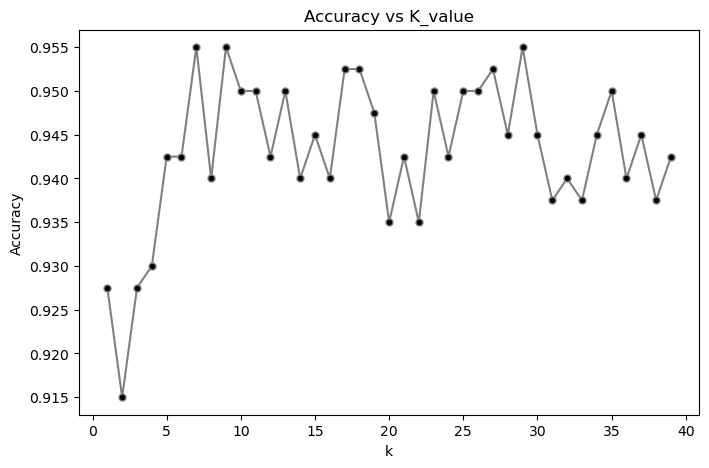

In [33]:
plt.figure(figsize=(8,5))
plt.plot(range(1,40),accuracies,color='gray',marker='o',markerfacecolor='black',markersize=5)
plt.title('Accuracy vs K_value')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.show()

In [34]:
knn=KNeighborsClassifier(n_neighbors=7)

In [35]:
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=7)

In [36]:
y_pred=knn.predict(x_test)

In [37]:
y_pred

array([0, 2, 1, 3, 1, 1, 2, 0, 3, 1, 0, 1, 2, 3, 2, 2, 3, 3, 1, 0, 0, 1,
       1, 2, 0, 1, 3, 2, 2, 0, 0, 0, 3, 0, 1, 1, 2, 0, 3, 0, 2, 3, 2, 0,
       2, 2, 2, 1, 3, 1, 3, 1, 0, 0, 0, 0, 1, 3, 0, 0, 1, 3, 3, 1, 0, 0,
       3, 3, 1, 2, 2, 2, 0, 1, 2, 0, 0, 3, 2, 2, 3, 2, 1, 0, 1, 3, 1, 3,
       3, 0, 3, 3, 2, 1, 3, 2, 2, 3, 1, 1, 0, 0, 1, 0, 0, 3, 2, 0, 1, 1,
       0, 0, 3, 1, 3, 2, 3, 2, 0, 2, 1, 3, 2, 1, 3, 3, 0, 2, 0, 2, 3, 0,
       2, 2, 0, 3, 1, 0, 0, 2, 2, 1, 3, 2, 0, 0, 0, 1, 1, 2, 3, 1, 1, 0,
       2, 2, 0, 1, 0, 2, 2, 3, 3, 2, 1, 0, 1, 2, 2, 3, 3, 0, 1, 0, 3, 1,
       1, 2, 1, 0, 0, 0, 0, 0, 3, 2, 0, 3, 0, 0, 0, 0, 1, 3, 3, 1, 0, 1,
       1, 1, 1, 2, 2, 2, 3, 3, 1, 2, 0, 0, 0, 2, 1, 1, 3, 1, 0, 2, 1, 1,
       3, 2, 3, 0, 0, 2, 1, 3, 0, 1, 2, 0, 2, 3, 2, 0, 1, 3, 3, 0, 1, 3,
       3, 3, 0, 3, 1, 2, 3, 3, 2, 1, 0, 3, 3, 1, 3, 3, 3, 3, 3, 0, 1, 2,
       2, 1, 3, 0, 2, 3, 2, 2, 2, 1, 0, 1, 0, 3, 3, 1, 3, 1, 0, 3, 1, 2,
       0, 0, 3, 0, 1, 2, 3, 3, 3, 1, 1, 0, 1, 3, 3,

In [38]:
y_test

1860    0
353     2
1333    1
905     3
1289    1
       ..
965     3
1284    2
1739    1
261     1
535     2
Name: price_range, Length: 400, dtype: int64

In [39]:
print("accuracy_score : ",accuracy_score(y_test,y_pred))
print("precision_score : ",precision_score(y_test,y_pred,average='weighted'))
print("recall_score : ",recall_score(y_test,y_pred,average='weighted'))
print("f1_score : ",f1_score(y_test,y_pred,average='weighted'))
print("confusion_matrix : ",confusion_matrix(y_test,y_pred), pd.crosstab(y_test,y_pred))
print(classification_report(y_test,y_pred))

accuracy_score :  0.955
precision_score :  0.9558140286339232
recall_score :  0.955
f1_score :  0.955184491606056
confusion_matrix :  [[102   3   0   0]
 [  3  87   1   0]
 [  0   4  87   1]
 [  0   0   6 106]] col_0          0   1   2    3
price_range                  
0            102   3   0    0
1              3  87   1    0
2              0   4  87    1
3              0   0   6  106
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       105
           1       0.93      0.96      0.94        91
           2       0.93      0.95      0.94        92
           3       0.99      0.95      0.97       112

    accuracy                           0.95       400
   macro avg       0.95      0.95      0.95       400
weighted avg       0.96      0.95      0.96       400



In [40]:
# Example input
mylist = [[1600, 1, 2.3, 1, 12, 1, 64, 1.2, 145, 8, 16, 1500, 2000, 3500, 12, 10, 18, 1, 1, 1]]
prediction = knn.predict(mylist)
print(prediction)

[3]


C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


# Insights
1. Highest accuracy: 95.5%, excellent overall performance.
2. Handles non-linear relationships well, especially for mid-range prices.
3. Sensitive to feature scaling and computationally heavy for large datasets.
4. RAM, battery, and pixel resolution are the main predictors of price.


# 2) Logistic Algorithm

In [41]:
from sklearn.preprocessing import StandardScaler
scaler1 = StandardScaler()
col = x.columns
x_new = scaler1.fit_transform(x_train) 
x_train = pd.DataFrame(data=x_new,columns = col)

In [42]:
x_new = scaler1.transform(x_test)
x_test = pd.DataFrame(data=x_new,columns = col)

In [43]:
from sklearn.linear_model import LogisticRegression
LR1 = LogisticRegression(multi_class='ovr')
LR1.fit(x_train,y_train)
ypred = LR1.predict(x_test)
x2 = pd.DataFrame()
x2[0] = ypred
x2[1] = y_test.values
x2.rename(columns={0: "Y_pred"}, inplace=True)
x2.rename(columns={1: "Y_test"}, inplace=True)
x2

C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


,Y_pred,Y_test
0,0,0
1,2,2
2,2,1
3,3,3
4,1,1
...,...,...
395,3,3
396,2,2
397,1,1
398,2,1


In [44]:
print("accuracy_score : ",accuracy_score(y_test,ypred))
print("precision_score : ",precision_score(y_test,ypred,average='weighted'))
print("recall_score : ",recall_score(y_test,ypred,average='weighted'))
print("f1_score : ",f1_score(y_test,ypred,average='weighted'))
print("confusion_matrix : ",confusion_matrix(y_test,ypred), pd.crosstab(y_test,ypred))
print(classification_report(y_test,ypred))

accuracy_score :  0.8775
precision_score :  0.873818461280017
recall_score :  0.8775
f1_score :  0.8744567811601897
confusion_matrix :  [[105   0   0   0]
 [  4  64  23   0]
 [  0  15  70   7]
 [  0   0   0 112]] col_0          0   1   2    3
price_range                  
0            105   0   0    0
1              4  64  23    0
2              0  15  70    7
3              0   0   0  112
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       105
           1       0.81      0.70      0.75        91
           2       0.75      0.76      0.76        92
           3       0.94      1.00      0.97       112

    accuracy                           0.88       400
   macro avg       0.87      0.87      0.87       400
weighted avg       0.87      0.88      0.87       400



In [45]:
# Example input
mylist = [[700, 0, 1.5, 0, 3, 0, 16, 0.5, 110, 4, 8, 500, 800, 900, 8, 7, 10, 1, 0, 0]]
scaled_input = scaler1.transform(mylist)
logistic_pred = LR1.predict(scaled_input)
print("Logistic Regression Prediction:", logistic_pred)

Logistic Regression Prediction: [0]


C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


# Insights
1. Accuracy: 87.75%, lower than KNN and Random Forest.
2. Performs well for low-end and high-end phones (classes 0 & 3).
3. Struggles with mid-range phones; assumes linear decision boundaries.
4. Easy to interpret; useful for feature influence analysis.


# 3) Random Forest

In [46]:
from sklearn.ensemble import RandomForestClassifier

# Random Forest Model
rf = RandomForestClassifier(
    n_estimators=200,
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=42
)

rf.fit(x_train, y_train)

y_pred_rf = rf.predict(x_test)

print("\n------ Random Forest Results ------")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Precision:", precision_score(y_test, y_pred_rf, average='weighted'))
print("Recall:", recall_score(y_test, y_pred_rf, average='weighted'))
print("F1 Score:", f1_score(y_test, y_pred_rf, average='weighted'))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))



------ Random Forest Results ------
Accuracy: 0.8925
Precision: 0.8944728886021207
Recall: 0.8925
F1 Score: 0.8929597876630996
Confusion Matrix:
 [[101   4   0   0]
 [  6  78   7   0]
 [  0   6  79   7]
 [  0   0  13  99]]

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.96      0.95       105
           1       0.89      0.86      0.87        91
           2       0.80      0.86      0.83        92
           3       0.93      0.88      0.91       112

    accuracy                           0.89       400
   macro avg       0.89      0.89      0.89       400
weighted avg       0.89      0.89      0.89       400



In [47]:
# Example input
mylist = [[1600, 1, 2.3, 1, 12, 1, 64, 1.2, 145, 8, 16, 1500, 2000, 3500, 12, 10, 18, 1, 1, 1]]
rf_pred = rf.predict(mylist)
print("Random Forest Prediction:", rf_pred)

Random Forest Prediction: [3]


C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


# Insights

1. Accuracy: 89.25%, better than Logistic Regression, slightly below KNN.
2. Handles non-linear patterns and feature interactions well.
3. Robust against overfitting; provides feature importance insights.
4. Slightly less interpretable and scalable than Logistic Regression.

# Model Comparison Report

Multiple classification models were trained to predict the price range of mobile phones based on hardware specifications. The table below summarizes the performance of each model:

| **Model**                | **Accuracy** | **Precision** | **Recall** | **F1-Score** | **Comments**                                                                 |
|----------------------|----------|-----------|--------|----------|---------------------------------------------------------------------------|
| KNN (k=7)            | 0.955    | 0.956     | 0.955  | 0.955    | Highest accuracy; works well because data is balanced and distance-based. |
| Logistic Regression  | 0.878    | 0.874     | 0.878  | 0.874    | Struggles with mid-range classes due to non-linear boundaries.           |
| Random Forest        | 0.892    | 0.894     | 0.892  | 0.890    | Good stability; captures non-linear relations; useful for feature importance. |

# Best Model

KNN with K=7 achieved the best accuracy (95.5%).

# CHALLENGES FACED and SOLUTIONS

| **Challenge**                           | **Why It Was a Problem**                | **Technique Used**               | **Reason for Technique**          |
| --------------------------------------- | --------------------------------------- | -------------------------------- | --------------------------------- |
| Wide variation in numeric features      | Distance-based algorithms get distorted | StandardScaler               | Ensures fair distance calculation |
| Nonlinear relationships                 | Logistic Regression struggled           | KNN & Random Forest          | Capture nonlinear boundaries      |
| Choosing best k-value                   | Wrong k leads to over/underfitting      | Tested k = 1 to 40          | Observed highest accuracy at k=7  |
| Weak correlations between many features | Hard to identify top features           | Heatmap  | Highlights impactful predictors   |
| Many features, balanced dataset         | Some models become unstable             | Compared multiple algorithms | Ensures robust selection          |


# Business Impact of the Model

| **Business Factor**       | **Model Contribution**                                                |
| ------------------------- | --------------------------------------------------------------------- |
| **Pricing decisions**     | Predicts correct price tier based on specs, reducing mispricing risk. |
| **Market segmentation**   | Helps classify devices into budget/mid/premium segments.              |
| **Inventory planning**    | Guides stock allocation by predicting demand for each price range.    |
| **Competitive advantage** | Enables faster product positioning based on spec-driven insights.     |
| **Feature insights**      | Identifies what hardware upgrades meaningfully increase market value. |


# Final Summary

* KNN (k=7) is the recommended production model, backed by the highest accuracy and consistent class-wise performance.
* Data exploration confirmed RAM, pixel resolution, and battery power as the core drivers of price prediction.
* Model performance improved significantly after proper scaling and hyperparameter tuning.

In [48]:
import sys
print(sys.version)


3.13.5 | packaged by Anaconda, Inc. | (main, Jun 12 2025, 16:37:03) [MSC v.1929 64 bit (AMD64)]


In [49]:
import pickle

# Save KNN model
with open("knn_model.pkl", "wb") as f:
    pickle.dump(knn, f)

print("Model saved successfully as knn_model.pkl")


Model saved successfully as knn_model.pkl
